In [1]:
# magics
%load_ext autoreload
%autoreload 2
%matplotlib inline

# custom modules and settings
from __future__ import division

# modules
import numpy as np
import os, glob

# plotting
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc
fp = {'family':'serif', 'serif':['Helvetica'], 'size':'20'}
rc('font', **fp)
rc('text',  usetex=True)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

# plot scaling
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['axes.grid'] = True

#Load Data
Use `glob.glob` with a wildcard, such as \* to read in multiple data paths and quickly plot customized sections of the analysis archive.

In [5]:
paths   = glob.glob('/media/rhopf/phd_home/d_work_various/d_south_africa_valves/a_experiments/analysis/M_*PPGA*loading.dat')
N_files = len(paths) 
paths

['/media/rhopf/phd_home/d_work_various/d_south_africa_valves/a_experiments/analysis/M_PS_PPGA_sample1B_sp1_test1_final_loading.dat',
 '/media/rhopf/phd_home/d_work_various/d_south_africa_valves/a_experiments/analysis/M_PS_PPGA_sample1B_sp2_test1_final_loading.dat',
 '/media/rhopf/phd_home/d_work_various/d_south_africa_valves/a_experiments/analysis/M_UA_PPGA_sample1A_sp1_test1_final_loading.dat',
 '/media/rhopf/phd_home/d_work_various/d_south_africa_valves/a_experiments/analysis/M_UA_PPGA_sample1A_sp2_test1_final_loading.dat']

In [6]:
data = []
for path in paths:
    
    # EDIT: unpacking format according to file ! ========================
    t, ex, ey, f, pk1, s = np.loadtxt(path).T
    
    # EDIT: append x and y for plot !
    data.append(np.array([ex, pk1]).T)
    # ===================================================================

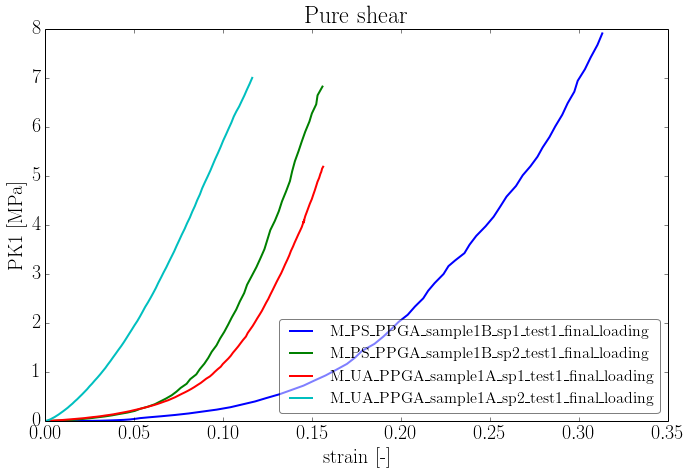

In [7]:
for i, (path, datai) in enumerate(zip(paths, data), 1):
    # EDIT: ensure fname
    fname = '\_'.join(path.split('/')[-1].split('.')[0].split('_'))
    plt.plot(datai[:, 0], datai[:, 1], lw=2, label=fname)
    
plt.legend(loc='best', fontsize=16, fancybox=True, framealpha=0.5)

# labels
plt.title('Pure shear')
plt.xlabel('strain [-]')
plt.ylabel('PK1 [MPa]')
plt.grid(None)
plt.tight_layout()
# plt.savefig('/home/rhopf/Dropbox/d_work_various/d_south_africa_valves/report_experiments_110615/graphics/valve_samples_ps_data.pdf')